# DSCI 6001 4.2 Lab

## A little more plotting with vectors

(this is a non-graded lab)

Today you're going to take the code you wrote yesterday and write additional classes to achieve the goal of visualizing intersections of lines and planes. Below we have provided a bit of code that allows you to visualize vectors (with some trouble). 

### TASK:

Build a program that takes in equations of 1 line and 1 plane (they can consist of just points on the line or plane, linear coefficients, or parameters, your choice) from user input and determines if these two intersect. If they intersect, visualize the intersection as best as you can. Make sure to create a good test suite for your program. You may work in conjunction with up to 3 other class members in your group.

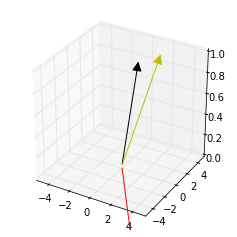

In [3]:
import numpy as np
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D

#you need to reference pyplot directly to have access to the figure object
import matplotlib.pyplot as plt
from itertools import product, combinations

fig = plt.figure()
ax = fig.gca(projection='3d')
ax.set_aspect("equal")

#this module allows us to do projective graphics
from mpl_toolkits.mplot3d import proj3d
#this is a patch that enables us to draw arrows in plots 
from matplotlib.patches import FancyArrowPatch

class Arrow3D(FancyArrowPatch):
    def __init__(self, xs, ys, zs, *args, **kwargs):
        FancyArrowPatch.__init__(self, (0,0), (0,0), *args, **kwargs)
        self._verts3d = xs, ys, zs
    #the draw method for every object is called by the show() function in plt
    def draw(self, renderer):
        xs3d, ys3d, zs3d = self._verts3d
        xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)
        self.set_positions((xs[0],ys[0]),(xs[1],ys[1]))
        FancyArrowPatch.draw(self, renderer)

#when you make your class, you will need to add an artist for every arrow
a = Arrow3D([0,1],[0,1],[0,1], mutation_scale=20, lw=1, arrowstyle="-|>", color="k") # "k" means black. 
ax.add_artist(a)

b = Arrow3D([0,2],[0,-1],[0,-1], mutation_scale=20, lw=1, arrowstyle="-|>", color="r")
ax.add_artist(b)

c = Arrow3D([0,2],[0,3],[0,1], mutation_scale=20, lw=1, arrowstyle="-|>", color="y")
ax.add_artist(c)

# as you can see, getting the plots to work nicely is big trouble. 
# You might consider axis rotation (http://matplotlib.org/examples/mplot3d/rotate_axes3d_demo.html)
plt.xlim(-5,5)
plt.ylim(-5,5)
plt.show()